Skew-normal DTD from Strolger et al. 2020

$$ \Phi(t) = \frac{1}{\omega\pi} \exp\Big(\frac{-(t-\xi)^2}{2\omega^2}\Big) \int_{-\infty}^{\alpha(\frac{t-\xi}{\omega})} \exp\Big(\frac{-t'^2}{2}\Big) dt' $$

In [83]:
import math as m

class SkewNormal:
    def __init__(self, loc=1, scale=1, shape=1):
        """
        Initialize the skew-noarmal distribution.
        
        Parameters
        ----------
        loc : float, optional
            Parameter which controls the location ($\\xi$). The default is 1.
        scale : float, optional
            Parameter which controls whe scale ($\omega$). The default is 1.
        shape : float, optional
            Parameter which controls the shape ($\alpha$). The default is 1.
        """
        self.loc = loc
        self.scale = scale
        self.shape = shape
        
    def __call__(self, time):
        """
        Call the skew-normal distribution at the given time.
        
        Parameters
        ----------
        time : float
            Time in Myr.
        
        Returns
        -------
        val : float
            The skew-normal distribution evaluated at time.
        """
        integral = self.integral(time)
#         print(integral)
        return 1/(self.scale * m.pi) * m.exp(-(time - self.loc)**2/(2*self.scale**2)) * integral
    
    def integral(self, time):
        """
        Evaluate the integral $\int_{-\infty}^{\alpha(\frac{t-\\xi}{\omega})} 
        \exp\Big(\frac{-t'^2}{2}\Big) dt'$ at $t$.
        
        Parameters
        ----------
        time : float
            Time in Myr.
        
        Returns
        -------
        val : float
            The integral evaulated at time.
        """
        upper = self.shape * (time - self.loc) / self.scale
        lower = self.shape * self.loc / self.scale
        # integrate with variable spacing
        # x is the variable of integration (represented above as t')
        x = -10
        dx = 0.1
        intlist = []
        while x < min(upper, 10):
            # if x is within 3 sigma of the center of the Gaussian,
            # use a finer integration step
            if x >= -3 or x < 3:
                dx = 1e-3
            else:
                dx = 0.1
            intlist.append(m.exp((-x**2)/2) * dx)
            x += dx
        return sum(intlist)

Reproducing Figure 3

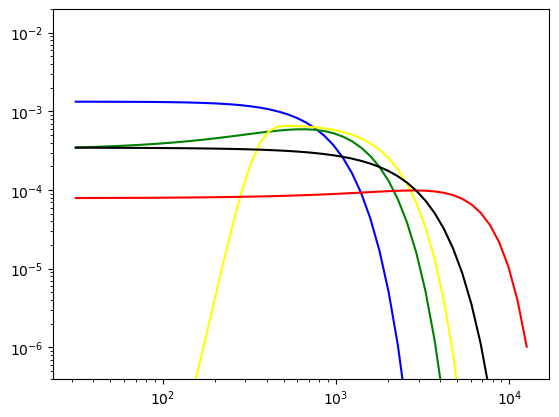

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Initialize plot
fig, ax = plt.subplots()
tarr = np.logspace(1.5, 4.1, num=50)

# list of parameters for 4 curves
params = [
    {'loc': 10, 'scale': 600, 'shape': 220},
    {'loc': 110, 'scale': 1000, 'shape': 2},
    {'loc': 350, 'scale': 1200, 'shape': 20},
    {'loc': 6000, 'scale': 6000, 'shape': -2},
    {'loc': -650, 'scale': 2200, 'shape': 1100},
]
colors = ['blue', 'green', 'yellow', 'red', 'black']

for param, color in zip(params, colors):
    sn = SkewNormal(**param)
    ax.plot(tarr, [sn(t) for t in tarr], c=color)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim((4e-7, 2e-2))
plt.show()

Inset panel from figure 5

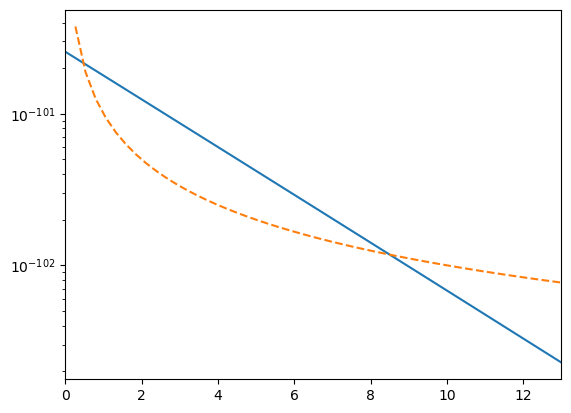

In [94]:
# Initialize plot
fig, ax = plt.subplots()
tarr = np.linspace(0, 13, num=50)

sn = SkewNormal(loc=-1258, scale=59, shape=248)
ax.plot(tarr, [sn(t) for t in tarr])
ax.plot(tarr[1:], 1e-101*tarr[1:]**-1, ls='--')

ax.set_yscale('log')
ax.set_xlim((0, 13))
# ax.set_ylim((4e-7, 2e-2))
plt.show()